-05-Basics-of Signalprocessing © by A.Richter
------------------------------------------

Intro to Image Analysis
--

In [1]:
import skimage
import skimage.io as skio
from skimage import exposure
from scipy.misc import bytescale

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

Einlesen von Bildern mit Scikit-Image
--

In [ ]:
Folder='../../../../_02_Analyse_von_FE_Daten/_01_Vorbereitung/'
IKOPan=skio.imread(Folder+'IKONOS2_dodola_Pan_Kanal/_Tif/po_221141_pan_sub.TIF')
IKORed=skio.imread(Folder+'IKONOS2_dodola_MS_Kanaele/_Tif/po_221141_red_sub.TIF')
IKOGreen=skio.imread(Folder+'IKONOS2_dodola_MS_Kanaele/_Tif/po_221141_green_sub.TIF')
IKOBlue=skio.imread(Folder+'IKONOS2_dodola_MS_Kanaele/_Tif/po_221141_blue_sub.TIF')
#IKONir=skio.imread(Folder+'IKONOS2_dodola_MS_Kanaele/_Tif/po_221141_nir_sub.TIF')
print IKORed.shape, IKORed.dtype


In [ ]:
print IKOPan[1000:1010,1000:1010]
print '-----'

print 'max Value: {}'.format(np.max(IKOPan))

Einlesen mit OpenCV
---

In [ ]:
#import cv2
%matplotlib inline
img=cv2.imread('doug.jpg',0)
plt.imshow('Doug',img)

8-bit Daten vs. 16-Bit Daten 

In [ ]:
# 8bit version aus den 16bit Kanälen machen

IKOPan8bit=bytescale(IKOPan)

#IKOPan8bit=skimage.img_as_ubyte(np.float32(IKOPan))
#IKORed8bit=skimage.img_as_ubyte(np.float32(IKORed))
#IKOGreen8bit=skimage.img_as_ubyte(IKOGreen)
#IKOBlue8bit=skimage.img_as_ubyte(IKOBlue)

print IKOPan8bit.shape, IKOPan8bit.dtype
print IKOPan8bit[1000:1010,1000:1010]
print '-----'

print 'max Value: {}'.format(np.max(IKOPan8bit))

Ausgabe des Histogramms des PAN oder Red Kanals
---

In [ ]:
print '16 bit - Histogramm'

fig=plt.figure(figsize=(10,3))
#hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern
hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print '----------------'
print '8 bit - Histogramm'


fig=plt.figure(figsize=(10,3))
#hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern
hist, bins = np.histogram(IKOPan8bit, bins=100)         #Anzahl der Intervalle, "bins" verändern

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Funktion zum Zusammenbauen eines RGB TrueColor Bildes
---

http://gis.stackexchange.com/questions/120951/merging-multiple-16-bit-image-bands-to-create-a-true-color-tiff'


In [ ]:

def create_composite(red_band, green_band, blue_band):

    img=np.dstack((red_band,green_band,blue_band))
    
    #p2, p98 = np.percentile(img, (2, 98)) 
    #img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    img_rescale = exposure.rescale_intensity(img, in_range='uint16')

    return bytescale(img_rescale)   # Konvertierung in 8bit für die Ausgabe
    #return img_rescale


image = create_composite(IKORed, IKOGreen, IKOBlue)
plt.figure(figsize=(20,10))  
plt.imshow(image)
plt.show()

# see http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots
  
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(image[0:50,0:50,0:3])
ax1.set_title('Details of the Scene')
ax2.imshow(image[0:400,0:400,0:3])
ax3.imshow(image[0:500,0:500,0:3])
ax4.imshow(image[0:500,0:500,0:3])
plt.show()

In [ ]:
image.dtype

Korrelation zwischen 2 Kanälen untersuchen
---

In [ ]:
np.corrcoef(np.ravel(IKORed),np.ravel(IKOGreen))

Filterungen
---

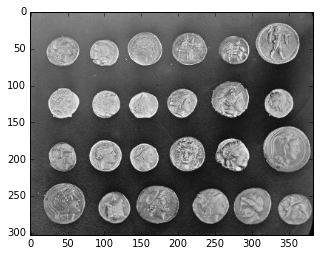

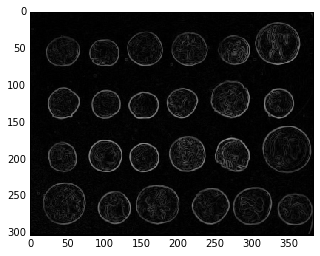

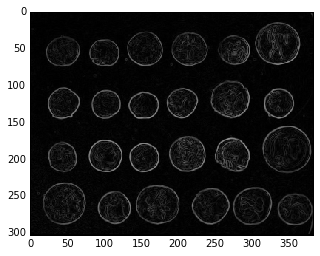

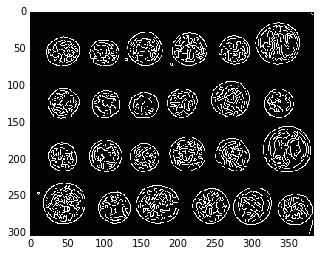

In [10]:
from skimage import data,filters,feature
image = data.coins() # or any NumPy array!
#edges = filters.median(image)
plt.imshow(image,cmap='gray')
plt.show()

edges = filters.prewitt(image)
skio.imshow(edges)
skio.show()


edges = filters.sobel(image)
skio.imshow(edges)
skio.show()

edges = feature.canny(image)
skio.imshow(edges)
skio.show()

Demo Signalverarbeitung
---

Ein einfaches Signal

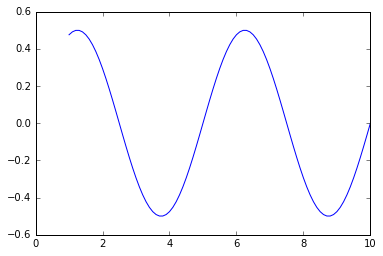

In [11]:
#ein einfaches Signal zur Erklärung/ Veranschaulichung der Signalverarbietung  
t=np.arange(1,1000,0.1)
x1=0.5*np.sin(2*np.pi*t/5)

plt.plot(t,x1)
plt.xlim(0,10)
plt.show()

Ein komplexeres Signal

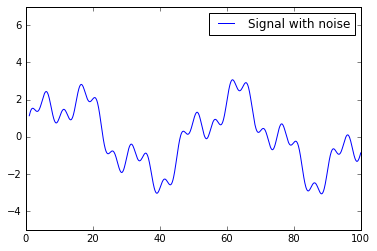

In [12]:

t=np.arange(1,1000,0.1)
x2=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)

plt.plot(t,x2, label='Signal with noise')
plt.xlim(0,100)
plt.ylim(-5,7)
plt.legend()
plt.show()

Ein komples Signal mit Rauschen (Gaussian Noise)

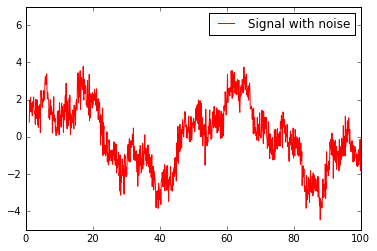

In [13]:

t=np.arange(1,1000,0.1)
#x3=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)
#add random noise
x3=x2+0.5*np.random.randn(t.shape[0])
#x3=x2+5*np.random.randn(t.shape[0])

plt.plot(t,x3,'r', label='Signal with noise')
#plt.plot(t,x2,'.b', label='original Signal')
plt.xlim(0,100)
plt.ylim(-5,7)
plt.legend()
plt.show()

Ein komples Signal mit einem Trend 

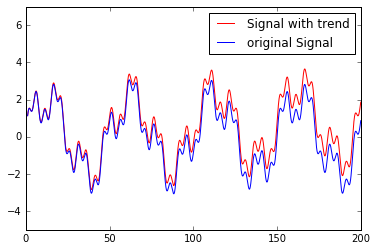

In [14]:

t=np.arange(1,1000,0.1)
#x3=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)
#add random noise
x4=x2+0.005*t

plt.plot(t,x4,'r', label='Signal with trend')
plt.plot(t,x2,'b', label='original Signal')
plt.xlim(0,200)
plt.ylim(-5,7)
plt.legend()
plt.show()

Ein komples Signal mit Rauschen (Gaussian Noise) und einem Trend....

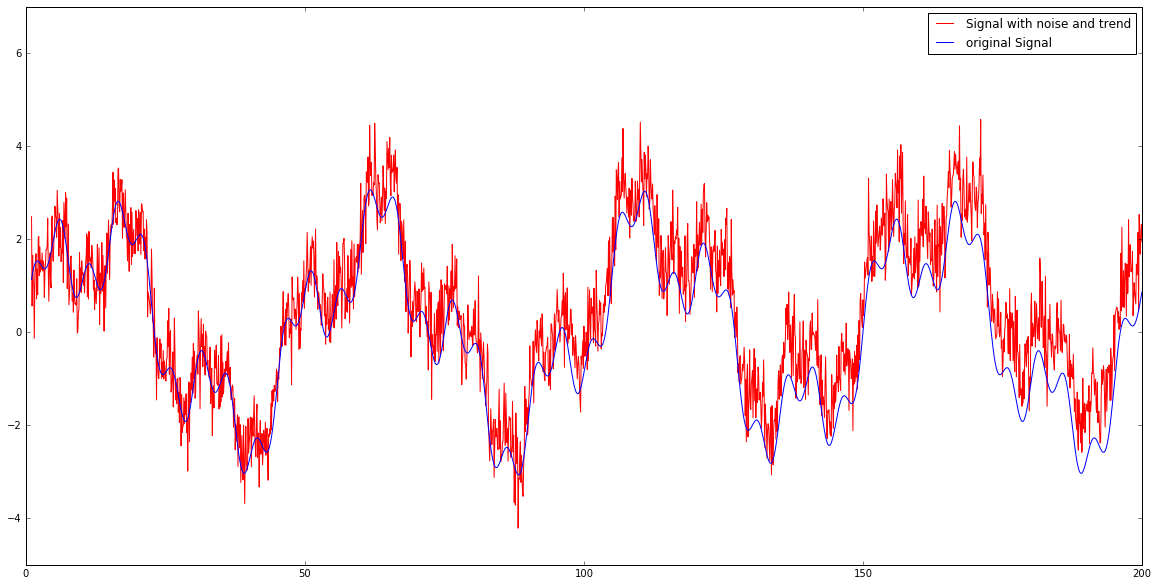

In [15]:

t=np.arange(1,1000,0.1)
#x3=0.5*np.sin(2*np.pi*t/5)+    2*np.sin(2*np.pi*t/50)+      np.sin(2*np.pi*t/15)
#add random noise
x5=x2+0.5*np.random.randn(t.shape[0])+0.005*t

plt.figure(figsize=(20,10))
plt.plot(t,x5,'r', label='Signal with noise and trend')
plt.plot(t,x2,'b', label='original Signal')
plt.xlim(0,200)
plt.ylim(-5,7)
plt.legend()
plt.show()

... die Realität ist noch komplexer!!!
---

https://de.wikipedia.org/wiki/Milankovi%C4%87-Zyklen  |  http://channel.nationalgeographic.com/videos/ice-age-cycles/


Was kann die Fourier-Transformation dazu beitragen

(9990,) (9990,)


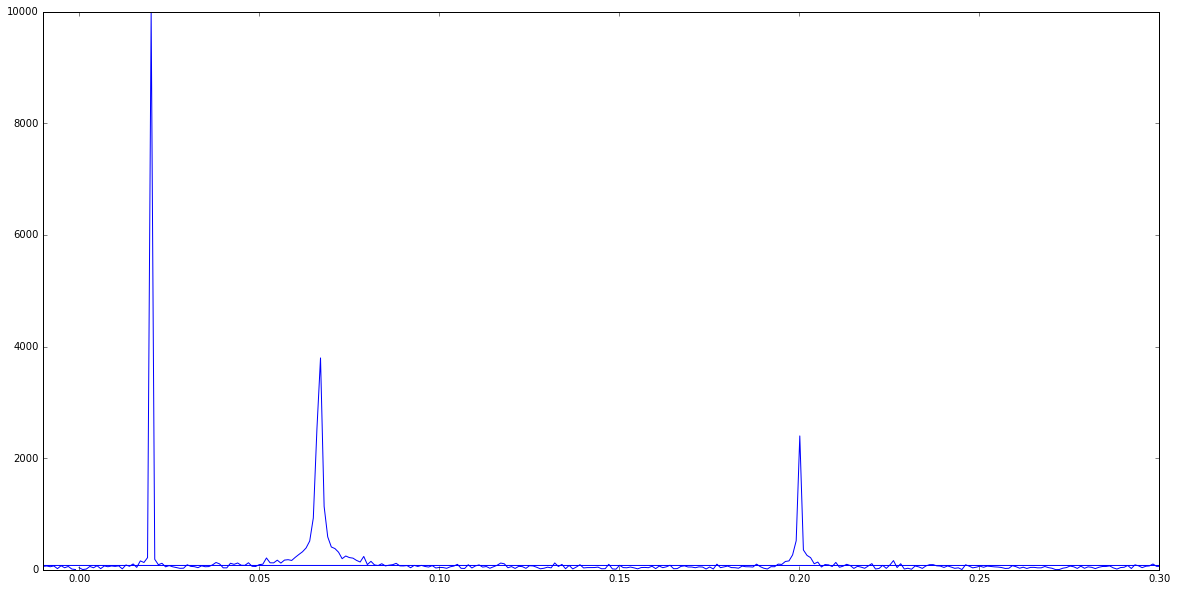

1/5: 0.2 | 1/15: 0.0666666666667 | 1/50: 0.02


In [16]:
#http://de.mathworks.com/help/matlab/ref/fft.html?searchHighlight=fft
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fft.html
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq
#https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html?highlight=fft

xf=np.fft.fft(x3)   # 1D FFT without noise
#xf=np.fft.fft(xn) # 1D FFT with noise!!!

timestep=0.1
freq = np.fft.fftfreq(x3.shape[0], d=timestep)

print freq.shape, xf.shape
plt.figure(figsize=(20,10))
plt.plot(freq,np.abs(xf))


#plt.xlim(0,6000)
plt.xlim(-0.01,0.3)
plt.show()
print '1/5: {} | 1/15: {} | 1/50: {}'.format(1./5. ,1./15., 1./50.)

(480, 446)
rows:  480
cols:  446


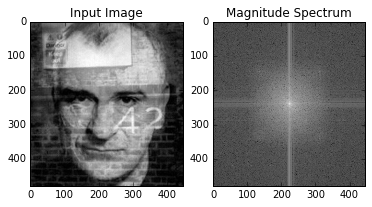

In [17]:
%matplotlib inline
img=cv2.imread('doug.jpg',0)

#Transformation in Frequenzraum

rows, cols = img.shape[0:2]
print img.shape
print "rows: ", rows
print "cols: ",cols

imgfft=np.fft.fft2(img)
fimgshift=np.fft.fftshift(imgfft)
magnitude_spectrum = 100*np.log(np.abs(fimgshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()